# Analysis of performance - power data

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
## Import data
file_path = '/Users/yzamora/power/initial_combo_logs/heartbeat_0x1-1200000.log'
df = pd.read_csv(file_path, sep='\s+')
print (df.head())

   Beat  Tag            Timestamp  Global_Rate  Window_Rate  Instant_Rate  \
0     0    0  1527326949297512609     0.000000     0.000000      0.000000   
1     1    1  1527326953058903759     0.531718     0.265859      0.265859   
2     2    2  1527326956838578947     0.397822     0.265214      0.264573   
3     3    3  1527326960616173890     0.353399     0.265049      0.264719   
4     4    4  1527326964388316847     0.331328     0.265062      0.265101   

   Global_Accuracy  Window_Accuracy  Instant_Accuracy  Global_Power  \
0              1.0              1.0               1.0      0.000000   
1              1.0              1.0               1.0      0.793298   
2              1.0              1.0               1.0      0.820799   
3              1.0              1.0               1.0      0.812252   
4              1.0              1.0               1.0      0.808221   

   Window_Power  Instant_Power  
0      0.000000       0.000000  
1      0.793298       0.793298  
2      0.82

## Plotting performance vs power using HeartLogs:

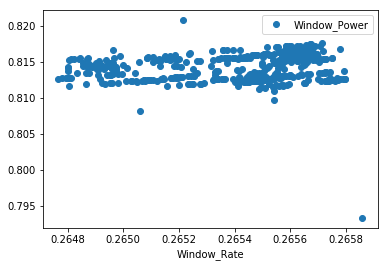

In [180]:
power = df['Window_Rate']
#removing first row, value = 0 
df = df.iloc[1:]
#print( power )
df.plot(x='Window_Rate', y='Window_Power', style='o')


## Performance vs power using STREAM.results

In [181]:
#Import Data
file_path = '/Users/yzamora/power/STREAM_big.results'
df = pd.read_csv(file_path, sep='\s+')
print (df.head())

  cores    freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY
0  0xe6  100000  5.887958  5.439624  461.927430         NaN        NaN
1  0xe6  200000  5.888939  5.474008  464.770101         NaN        NaN
2  0xe6  400000  5.897709  5.441137  461.291977         NaN        NaN
3  0xe6  600000  5.897312  5.442045  461.399975         NaN        NaN
4  0xe6  700000  5.908167  5.432657  459.758156         NaN        NaN


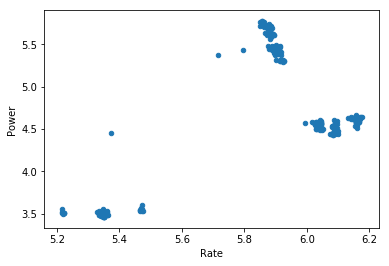

In [182]:

df.plot(x='Rate', y='Power',kind='scatter',style='o')


## Clock Speed vs Number of Cores

First Converting Hex to Binary, then getting the number of cores being used


In [183]:
def convert_to_bin(df):
    cores_hex = df['cores'].tolist()
    cores_bin = []
    big_cores = []
    lil_cores = []
    total_cores = []
    scale = 16 ## equals to hexadecimal
    num_of_bits = 8

    for i in cores_hex:
    #my_hexdata = "1a" 
        bin_val = bin(int(i, scale))[2:].zfill(num_of_bits)
        ncores=0
        nlittle=0
        nbig=0
        for j in range(len(bin_val)): 
            ncores+=int(bin_val[j])
            if j<4: nbig+=int(bin_val[j])
            else: nlittle+=int(bin_val[j])
        #print(bin_val+" big, little, total: "+str(nbig)+" "+str(nlittle)+" "+str(ncores))
        cores_bin.append(bin_val)
        big_cores.append(nbig)
        lil_cores.append(nlittle)
        total_cores.append(ncores)


    #print (cores_bin)
    df['big_cores'] = big_cores
    df['lil_cores'] = lil_cores
    df['total_cores'] = total_cores
    

    print(df.head())
    return df



In [184]:
#Creating columns for core positions
import numpy
def create_col(df):
    
    
    new_cols = {  'core-0': [], 
                  'core-1': [],  
                  'core-2': [], 
                  'core-3': [], 
                  'core-4': [], 
                  'core-5': [], 
                  'core-6': [],
                  'core-7': [] }
    
    current_row = []
    cores_hex = df['cores'].tolist()
    cores_bin = []
    big_cores = []
    lil_cores = []
    total_cores = []
    scale = 16 ## equals to hexadecimal
    num_of_bits = 8

    for i in cores_hex:
    #my_hexdata = "1a" 
        bin_val = bin(int(i, scale))[2:].zfill(num_of_bits)
        ncores=0
        nlittle=0
        nbig=0
        for j in range(len(bin_val)):
            dict_key = 'core-'+str(j)
            new_cols[ dict_key ].append( int( bin_val[ j ] ) )
            ncores+=int(bin_val[j])
            if j<4: nbig+=int(bin_val[j])
            else: nlittle+=int(bin_val[j])
        #print(bin_val+" big, little, total: "+str(nbig)+" "+str(nlittle)+" "+str(ncores))
        cores_bin.append(bin_val)
        big_cores.append(nbig)
        lil_cores.append(nlittle)
        total_cores.append(ncores)


    #print (cores_bin)
    df['big_cores'] = big_cores
    df['lil_cores'] = lil_cores
    df['total_cores'] = total_cores

    for j in range(len(bin_val)):
        dict_key = 'core-'+str(j)
        df[dict_key] = new_cols[dict_key]
    
    print(df)
    return df
    

In [185]:
#print(create_col(df))

df = create_col(df)

print(df.head())
#df = convert_to_bin(df)
#df.plot(x='total_cores', y='Rate',kind='scatter',style='o')

    cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0    0xe6   100000  5.887958  5.439624  461.927430         NaN        NaN   
1    0xe6   200000  5.888939  5.474008  464.770101         NaN        NaN   
2    0xe6   400000  5.897709  5.441137  461.291977         NaN        NaN   
3    0xe6   600000  5.897312  5.442045  461.399975         NaN        NaN   
4    0xe6   700000  5.908167  5.432657  459.758156         NaN        NaN   
5    0xe6   800000  5.893648  5.440728  461.575041         NaN        NaN   
6    0xe6  1000000  5.892087  5.463399  463.621307         NaN        NaN   
7    0xe6  1200000  5.879515  5.468053  465.008695         NaN        NaN   
8    0xe6  1400000  5.890988  5.457655  463.220651         NaN        NaN   
9    0xaa   100000  5.994764  4.567958  380.995561         NaN        NaN   
10   0xaa   200000  6.142090  4.639552  377.685050         NaN        NaN   
11   0xaa   400000  6.132738  4.633690  377.782892         NaN        NaN   

In [186]:
df = df.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])


In [187]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print ("X size:", X.shape)
print ("y size", y.shape)

X size: (324, 14)
y size (324,)


In [188]:
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
import scipy as sp
#import cPickle as pkl
import numpy as np
import matplotlib.pyplot as plt

## Using Random Forest Regressor

In [218]:
model = GridSearchCV(RandomForestRegressor(n_estimators=100),
                     param_grid=dict(max_features=range(5,15)),
                     scoring='neg_mean_squared_error',
                    cv=10)

In [219]:
model.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(5, 15)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

Text(0,0.5,'RMSD')

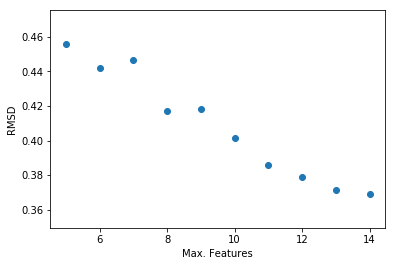

In [220]:
fig, ax = plt.subplots()
ax.scatter(model.cv_results_['param_max_features'].data,
          np.sqrt(-1 * model.cv_results_['mean_test_score']))
ax.set_xlabel('Max. Features')
ax.set_ylabel('RMSD')

### Get the best model based on these parameter selections

In [221]:
print (model.best_params_)

{'max_features': 14}


In [222]:
model = model.best_estimator_

## Estimating Prediction Accuracy

In [223]:
all_y_test = np.zeros((0,))
all_y_pred = np.zeros((0,))
for train_inds, test_inds in ShuffleSplit(n_splits=5, test_size=0.1).split(X,y):
    # Split off the train and test set
    X_test, y_test = X.iloc[test_inds, :], y[test_inds]
    X_train, y_train = X.iloc[train_inds, :], y[train_inds]
    
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Append the results
    all_y_test = np.concatenate((all_y_test, y_test))
    #print (all_y_test)
    all_y_pred = np.concatenate((all_y_pred, y_pred))

### Print out Scores

In [224]:
print ("R:", sp.stats.pearsonr(all_y_test, all_y_pred)[0])
print ("MAE:", np.abs(all_y_test - all_y_pred).mean(), 'eV/atom')
print ("RMSE:", np.sqrt(np.power(all_y_test - all_y_pred, 2).mean()), 'eV/atom')

R: 0.9900054696264341
MAE: 0.01812121212121212 eV/atom
RMSE: 0.07170224627731074 eV/atom


In [225]:
# Make a plot

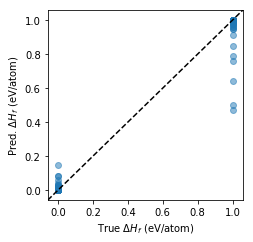

In [227]:
fig, ax = plt.subplots()

# Make the plot
ax.scatter(all_y_test, all_y_pred, alpha=0.5)

# Make it pretty
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_xlim())

ax.set_xlabel('True $\Delta H_f$ (eV/atom)')
ax.set_ylabel('Pred. $\Delta H_f$ (eV/atom)')

fig.set_size_inches(3.5, 3.5)

# Add in the goal line
ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--');

### Train the model and save it

In [228]:
model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=14, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

## Looking at little cores and big cores relationships
Function plot_biglil plots rate vs number of cores for both big, little, and core combinations

In [8]:
def plot_biglil(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(x=(df['Rate']),y=(df['big_cores']), label='Big Cores')
    ax1.scatter(x=(df['Rate']),y=(df['lil_cores']), label='Little Cores')
    ax1.scatter(x=(df['Rate']),y=(df['total_cores']), label='Total Cores')
    plt.legend(loc='best');
    ax1.set_xlabel("Rate")
    ax1.set_ylabel("Core Count")
    plt.show()


In [1]:
#print (df)


## New Results 'bigger results' of bit and little cores
Running with various core combinations:
10001 10001 , 1100 1100, 1010 1010, 1000 1000, 1111 1111, 1000 1111, 1010 1111, 1111 0001, 1111 0101, 0101 0101

Frequency Combinations: 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 2000000

In [11]:
#Import Data
file_path = '/Users/yzamora/power/STREAM.results'
long_df = pd.read_csv(file_path, sep='\s+')
print (long_df.tail())

   cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY
65  0x55  1600000  5.893376  4.612486  391.327924         NaN        NaN
66  0x55  1500000  5.895988  4.602915  390.342841         NaN        NaN
67  0x55  1400000  5.868398  4.597875  391.748605         NaN        NaN
68  0x55  1300000  5.888496  4.601728  390.738706         NaN        NaN
69  0x55  1200000  5.876194  4.600005  391.409825         NaN        NaN


In [7]:
long_df = convert_to_bin(long_df)
print (long_df)

  cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0  0x99  2000000  5.670083  4.539333  400.287916         NaN        NaN   
1  0x99  1700000  5.892192  4.610204  391.212691         NaN        NaN   
2  0x99  1600000  5.892635  4.589785  389.450600         NaN        NaN   
3  0x99  1500000  5.995669  4.610535  384.488650         NaN        NaN   
4  0x99  1400000  5.958496  4.611672  386.982460         NaN        NaN   

   big_cores  lil_cores  total_cores  
0          2          2            4  
1          2          2            4  
2          2          2            4  
3          2          2            4  
4          2          2            4  
   cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0   0x99  2000000  5.670083  4.539333  400.287916         NaN        NaN   
1   0x99  1700000  5.892192  4.610204  391.212691         NaN        NaN   
2   0x99  1600000  5.892635  4.589785  389.450600         NaN        NaN   
3   0x99  1

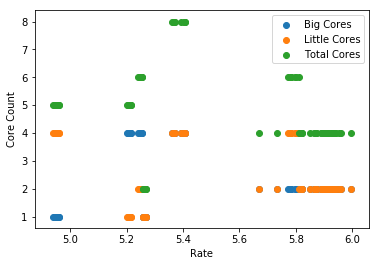

In [9]:
plot_biglil(long_df)

## Using only Mixed Cores (No all big or all little)

In [5]:
#Import Data
file_path = '/Users/yzamora/power/STREAM_results_mixed/STREAM.results'
df_mixed = pd.read_csv(file_path, sep='\s+')
print(df_mixed.head)

<bound method NDFrame.head of     cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY
0    0xe6   100000  5.887958  5.439624  461.927430         NaN        NaN
1    0xe6   200000  5.888939  5.474008  464.770101         NaN        NaN
2    0xe6   400000  5.897709  5.441137  461.291977         NaN        NaN
3    0xe6   600000  5.897312  5.442045  461.399975         NaN        NaN
4    0xe6   700000  5.908167  5.432657  459.758156         NaN        NaN
5    0xe6   800000  5.893648  5.440728  461.575041         NaN        NaN
6    0xe6  1000000  5.892087  5.463399  463.621307         NaN        NaN
7    0xe6  1200000  5.879515  5.468053  465.008695         NaN        NaN
8    0xe6  1400000  5.890988  5.457655  463.220651         NaN        NaN
9    0xaa   100000  5.994764  4.567958  380.995561         NaN        NaN
10   0xaa   200000  6.142090  4.639552  377.685050         NaN        NaN
11   0xaa   400000  6.132738  4.633690  377.782892         NaN        NaN
12   0xa

In [4]:
#Import Data
file_path = '/Users/yzamora/power/false_data.csv'
df_mixed = pd.read_csv(file_path, sep=',')
print(df_mixed.head)

<bound method NDFrame.head of      core 0  core 1  core 2  core 3  core 4   core 5   core 6  core 7   \
0         0       0       1       1        1        1       1        1   
1         0       0       1       1        1        1       1        1   
2         0       0       0       0        1        1       1        1   
3         1       1       1       1        1        1       1        1   
4         1       1       0       1        1        1       1        1   
5         1       1       1       1        1        1       1        1   
6         1       1       0       0        0        1       1        1   
7         1       1       1       1        1        1       1        1   
8         0       0       0       0        0        0       0        0   
9         1       0       1       1        1        1       1        1   
10        0       0       1       0        1        0       1        1   
11        1       1       0       1        1        1       1        1   
12      